In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data_pt_brazil_normalized_emoji_merged.csv',
                sep=',',
                converters={
                     "normalized_text_stemm_emoji": lambda x: x.strip("[]").replace("'","").split(", ")
                 })
df = df[['created_at', 'normalized_text_stemm_emoji', 'sentiment']]
df.head()

,created_at,normalized_text_stemm_emoji,sentiment
0,2021-07-04 22:17:21,"[após, fic, silênci, cpi, carl, wizard, retorn...",Positivo
1,2019-11-30 14:35:33,"[lamb, fon, ouv, list, doenç, transmiss, oral,...",Negativo
2,2022-01-11 12:12:28,"[defin, vacin, tip, subst, bactér, introduz, c...",Negativo
3,2019-11-19 14:52:06,"[iphon, segur, contr, ]",Positivo
4,2021-12-28 23:09:10,"[estrag, complet, tud, ]",Negativo


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
df['input'] = df['normalized_text_stemm_emoji'].apply(lambda x: ' '.join([word for word in x]))

vectorizer = CountVectorizer(lowercase=False, min_df=50)
X = vectorizer.fit_transform(df['input'].values)

print(vectorizer.get_feature_names())
print(X.toarray())

['18h', '20h', '24h', '48h', 'abaix', 'abal', 'abandon', 'abenço', 'abert', 'abord', 'abort', 'abr', 'abraç', 'abril', 'absolut', 'absurd', 'abus', 'acab', 'academ', 'acas', 'account', 'aceit', 'aceler', 'acerc', 'acert', 'acess', 'ach', 'acid', 'acim', 'acion', 'acomet', 'acompanh', 'aconselh', 'acontec', 'acord', 'acostum', 'acr', 'acredit', 'acumul', 'acus', 'adapt', 'adequ', 'adeu', 'adi', 'adiant', 'adic', 'adiv', 'adm', 'administr', 'admir', 'admit', 'adoec', 'adolesc', 'ador', 'adot', 'adquir', 'adult', 'advers', 'advog', 'aeroport', 'afast', 'afet', 'aff', 'afim', 'afinal', 'afirm', 'afric', 'aft', 'age', 'agend', 'agent', 'agind', 'agir', 'aglom', 'aglomer', 'agor', 'agost', 'agr', 'agradec', 'agradeç', 'agrav', 'agress', 'agu', 'aguard', 'agud', 'aguent', 'agulh', 'agênc', 'ai', 'aid', 'ain', 'aind', 'ajud', 'ala', 'alago', 'alarm', 'alastr', 'albert', 'alcanç', 'alcool', 'alcoól', 'alde', 'aleatóri', 'aleg', 'alegr', 'alem', 'alemanh', 'alenc', 'alerg', 'alert', 'alessandr',

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
Y = list(df['sentiment'].replace(['Positivo','Negativo','Neutro'],[1,-1,0]))

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.toarray(), Y, test_size=0.20, random_state=42)

In [6]:
# Modelling
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [16]:
nb = GaussianNB(var_smoothing=0.0023101297000831605)
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.0023101297000831605)

In [17]:
y_pred = nb.predict(X_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.59605


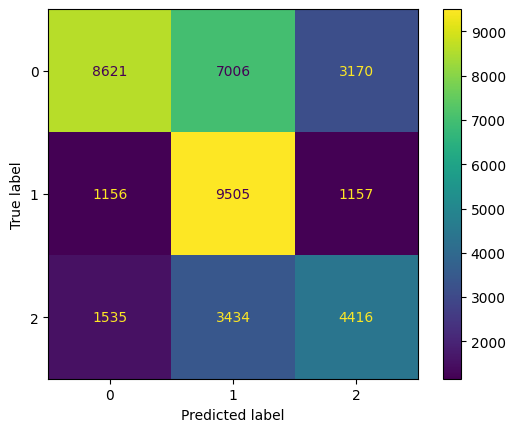

In [10]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.76      0.46      0.57     18797
           0       0.48      0.80      0.60     11818
           1       0.51      0.47      0.49      9385

    accuracy                           0.56     40000
   macro avg       0.58      0.58      0.55     40000
weighted avg       0.62      0.56      0.56     40000

